In [1]:
from glob import glob
import os
from collections import defaultdict
import cv2
from  matplotlib import pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from PIL import Image
import numpy as np
import json
from tqdm import tqdm
from glob import glob

%matplotlib inline

path = '/nfs/nas-5.1/wbcheng/Chinese_Word_Recognition/'

In [ ]:
total = 0
for file in tqdm(glob(os.path.join(path, 'Modified', '*.jpg'))):
    img_name = file.split('/')[-1]
    store[img_name[-5]].append(img_name.split('_')[0])
    cnt += 1
#     im = Image.open(file).convert("RGB")
    im = cv2.imread(file, 0)	# load image as bgr
#     im = im[:,:,::-1] 	# transform image to rgb
    
    _, thre_img = cv2.threshold(im, 0, 255, cv2.THRESH_OTSU)
    total += 1
#     plt.imshow(thre_img, 'gray')
#     plt.show()
    cv2.imwrite(os.path.join(path, 'Modified_Thres', img_name), thre_img)
print('Finish {} image'.format(total))

In [3]:
with open('./word2label.json', 'r', encoding='utf-8') as f:
    word2label = json.load(f)

found = 0
not_found = 0
null_cnt = 0
total = 0

for file in tqdm(glob(os.path.join(path, 'Pretrain_Common', '*'))):
    img_name = file.split('/')[-1]
    label = img_name.split('_')[0]
    im = cv2.imread(file, cv2.IMREAD_GRAYSCALE)	# load image as bgr
    
    if im is None:
        null_cnt += 1
        continue
        
    total += 1
    
    _, thre_img = cv2.threshold(im, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    thre_img = cv2.fastNlMeansDenoising(thre_img, h=13, searchWindowSize=7)
#         kernel = np.ones((3,3), np.uint8)
#         thre_img = cv2.erode(thre_img, kernel, iterations = 1)

    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
    dilate = cv2.dilate(thre_img, rect_kernel, iterations = 1)

    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    if len(contours) == 0:
        bound = cv2.resize(im, (50,50))
        print('not found')
        not_found += 1
    else:
        max_area = -1
        bx, by, bw, bh = None, None, None, None
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            if w * h > max_area:
                bx, by, bw, bh = x, y, w, h
                max_area = w * h
            # Drawing a rectangle on copied image
        bound = cv2.resize(im[by:by+bh, bx:bx+bw], (50, 50))
        rect = cv2.rectangle(im, (bx, by), (bx + bw, by + bh), (0, 0, 255), 1)
        found += 1

    cv2.imwrite(os.path.join(path, 'Pretrain_Common_Modified', img_name), bound)

print('Total {} img found {} bounding box\t {} not found\t{} null images'.format(total, found, not_found, null_cnt))

#         imgs = [im, thre_img, dilate, bound]
#         titles = ['ori', 'thre_img', 'dilate', 'bounding']
#         fig, axs = plt.subplots(nrows=1, ncols=4)
#         for i, ax in enumerate(axs.flatten()):
#             plt.sca(ax)
#             plt.imshow(imgs[i], 'gray', vmin=0, vmax=255)
#             plt.title('Image: {}'.format(titles[i]))
#         plt.show()

 10%|▉         | 25009/250713 [03:25<40:17, 93.35it/s]  

not found


 19%|█▊        | 46909/250713 [14:27<3:26:26, 16.45it/s]

not found


 23%|██▎       | 57701/250713 [25:51<3:31:35, 15.20it/s]

not found


 34%|███▎      | 84548/250713 [1:02:02<4:10:55, 11.04it/s]

not found


 39%|███▉      | 97241/250713 [1:22:46<4:44:39,  8.99it/s]

not found


 40%|████      | 101026/250713 [1:29:26<4:39:36,  8.92it/s]

not found


 42%|████▏     | 105788/250713 [1:38:05<4:47:06,  8.41it/s]

not found


 42%|████▏     | 106332/250713 [1:39:06<4:51:37,  8.25it/s]

not found


 49%|████▉     | 123624/250713 [2:13:31<4:21:38,  8.10it/s] 

not found


 60%|█████▉    | 149650/250713 [3:13:13<4:04:03,  6.90it/s]

not found


 60%|██████    | 151037/250713 [3:16:39<4:04:56,  6.78it/s]

not found


 71%|███████   | 178199/250713 [4:29:34<3:21:02,  6.01it/s]

not found


 71%|███████   | 178254/250713 [4:29:44<3:25:48,  5.87it/s]

not found


 80%|███████▉  | 200014/250713 [5:35:41<2:38:30,  5.33it/s]

not found


 81%|████████  | 203270/250713 [5:46:08<2:29:57,  5.27it/s]

not found


 82%|████████▏ | 205382/250713 [5:53:01<2:26:55,  5.14it/s]

not found


 84%|████████▎ | 209763/250713 [6:07:29<2:14:52,  5.06it/s]

not found


 93%|█████████▎| 234071/250713 [7:32:11<1:00:08,  4.61it/s]

not found


 99%|█████████▉| 249325/250713 [8:29:31<05:21,  4.32it/s]  

not found


100%|██████████| 250713/250713 [8:34:52<00:00,  8.12it/s]

Total 250712 img found 250693 bounding box	 19 not found	1 null images


9553_教.jpg


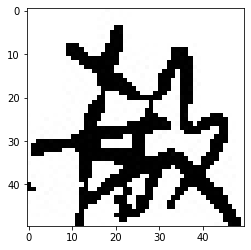


52961_卓.jpg


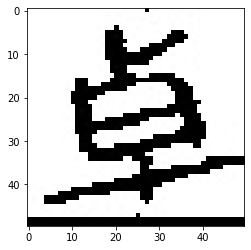


51360_逸.jpg


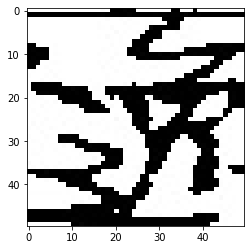


66194_峰.jpg


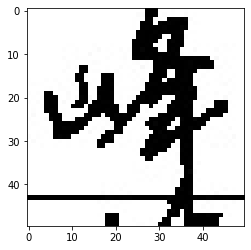


35824_場.jpg


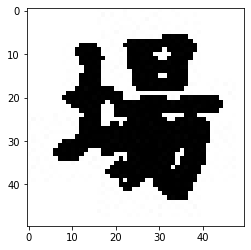


33000_巫.jpg


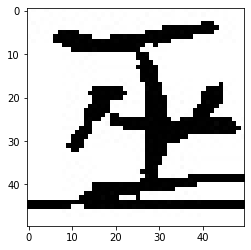


1493_淑.jpg


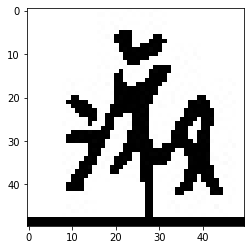


61860_昶.jpg


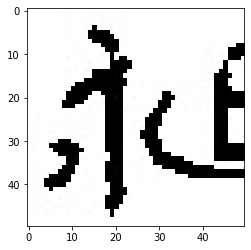


6546_基.jpg


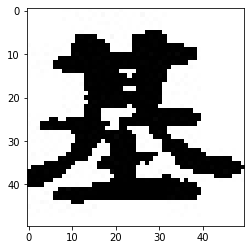


9477_慧.jpg


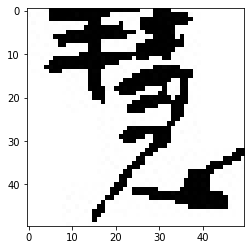


15506_關.jpg


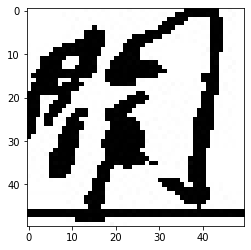


13415_冠.jpg


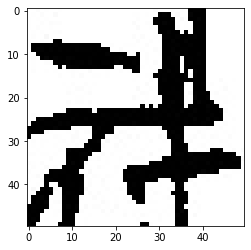


52442_晟.jpg


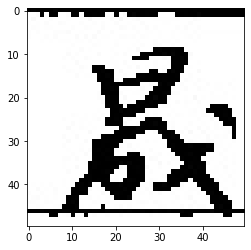


9231_流.jpg


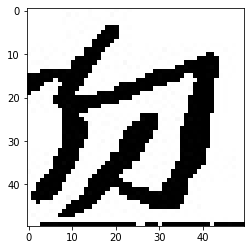


35877_和.jpg


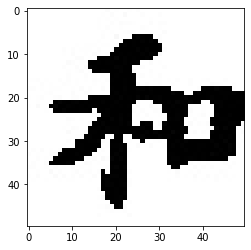


27719_多.jpg


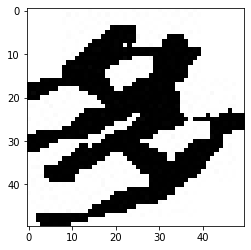


41782_幸.jpg


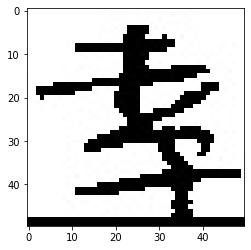


11293_翊.jpg


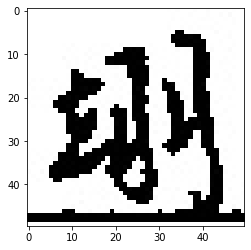

KeyboardInterrupt: Interrupted by user

In [6]:
for file in glob(os.path.join(path, 'Modified_Thres', '*')):
    img_name = file.split('/')[-1]
    im = cv2.imread(file, 1)	# load image as bgr
    im = im[:,:,::-1]
    print(img_name)
    plt.imshow(im)
    plt.show()
    
    input()

喟_46.png


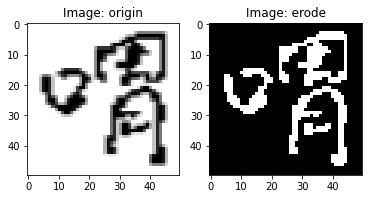


徘_9.png


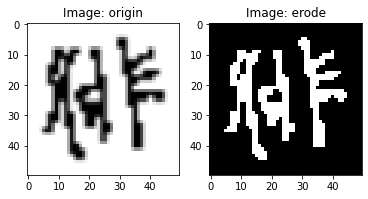


珮_3.png


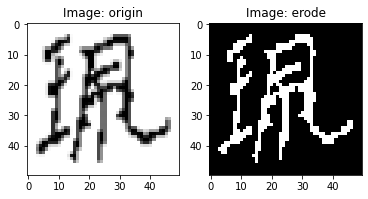


隕_5.png


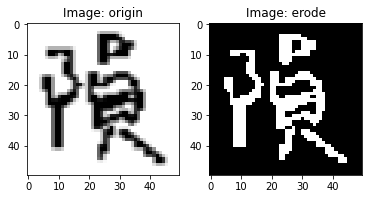


莫_18.png


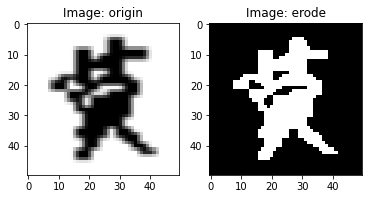


乃_28.png


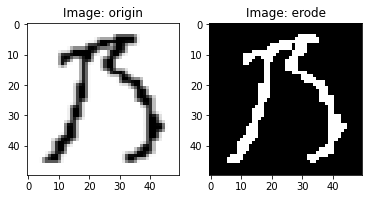


鈉_9.png


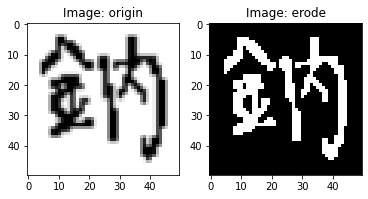


吶_49.png


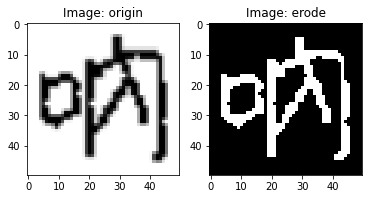


飛_4.png


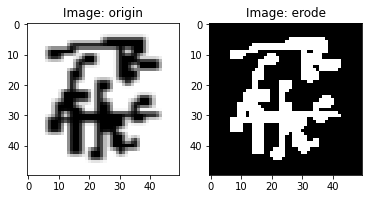


佑_15.png


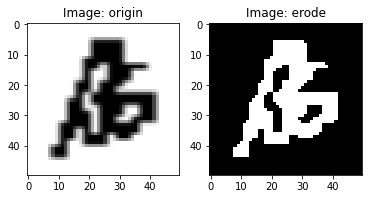


婊_49.png


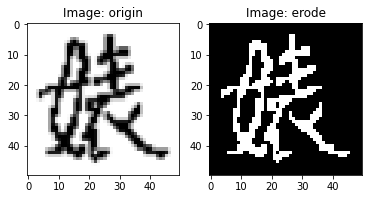


啡_11.png


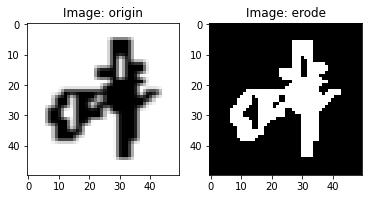


耜_13.png


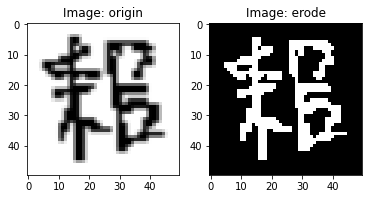


綾_44.png


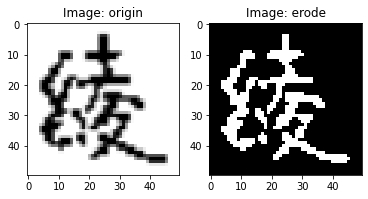


盾_1.png


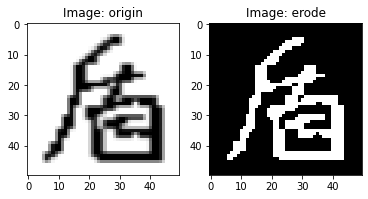


茲_41.png


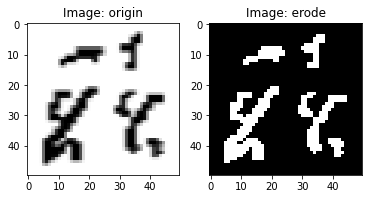

KeyboardInterrupt: Interrupted by user

In [10]:
for file in glob(os.path.join(path, 'Pretrain_Common_Modified', '*')):
    img_name = file.split('/')[-1]
    label = img_name.split('_')[0]
    im = cv2.imread(file, 1)	# load image as bgr
#     im = im[:,:,::-1]
    _, thre_img = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((1,1), np.uint8)
    thre_img = cv2.erode(thre_img, kernel, iterations = 1)
    print(img_name)
    imgs = [im, thre_img]
    titles = ['origin', 'erode']
    fig, axs = plt.subplots(nrows=1, ncols=2)
    for i, ax in enumerate(axs.flatten()):
        plt.sca(ax)
#         if i != 2: plt.imshow(imgs[i], 'gray', vmin=0, vmax=255)
        plt.imshow(imgs[i])
        plt.title('Image: {}'.format(titles[i]))

    #plt.tight_layout()
    plt.show()
    
    input()

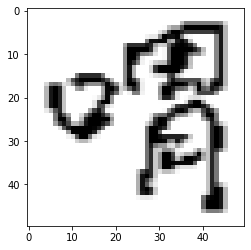

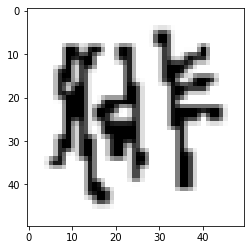

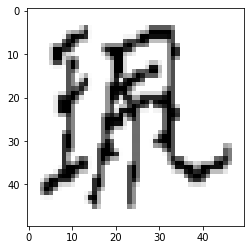

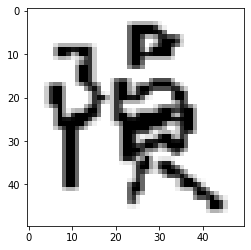

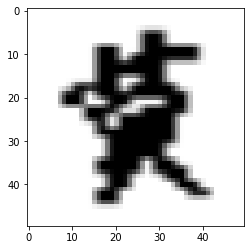

KeyboardInterrupt: Interrupted by user

In [11]:
for file in glob(os.path.join(path, 'Pretrain_Common_Modified', '*')):
    img_name = file.split('/')[-1]
    label = img_name.split('_')[0]
    img = Image.open(file).convert("RGB")
    plt.imshow(img)
    plt.show()
    input()

In [ ]:
store = defaultdict(list)
found = 0
not_found = 0
null_cnt = 0
total = 0

for file in tqdm(glob(os.path.join(path, 'Origin', '*.jpg'))):
    img_name = file.split('/')[-1]
    store[img_name[-5]].append(img_name.split('_')[0])
    ori_img = cv2.imread(file, 1)
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    total += 1
    if ori_img is None:
#         print('NULL image ', img_name)
        null_cnt += 1
        continue

    _, thre_img = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
#     _, im = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY_INV)
#     im = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,31,2)

    thre_img = cv2.fastNlMeansDenoising(thre_img, h=13, searchWindowSize=7)
    kernel = np.ones((3,3), np.uint8)
    thre_img = cv2.erode(thre_img, kernel, iterations = 1)

    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 13))
    dilate = cv2.dilate(thre_img, rect_kernel, iterations = 1)
    
    contours, hierarchy = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    if len(contours) == 0:
        bound = cv2.resize(img, (50,50))
        not_found += 1
    else:
        max_area = -1
        bx, by, bw, bh = None, None, None, None
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            if w * h > max_area:
                bx, by, bw, bh = x, y, w, h
                max_area = w * h
            # Drawing a rectangle on copied image
        bound = cv2.resize(img[by:by+bh, bx:bx+bw], (50, 50))
        rect = cv2.rectangle(ori_img, (bx, by), (bx + bw, by + bh), (0, 0, 255), 1)
        found += 1
    save_path = os.path.join(path, 'Modified', img_name)
    cv2.imwrite(save_path, bound)
    
print('Total {} img found {} bounding box\t {} not found\t{} null images'.format(total, found, not_found, null_cnt))
        #     plt.imshow(img, cmap='gray', vmin=0, vmax=255)
#     imgs = [thre_img, dilate, ori_img, bound]
#     titles = ['thres', 'dilate', 'result', 'bounding']
#     fig, axs = plt.subplots(nrows=1, ncols=4)
#     for i, ax in enumerate(axs.flatten()):
#         plt.sca(ax)
#         if i != 2: plt.imshow(imgs[i], 'gray', vmin=0, vmax=255)
#         else: plt.imshow(imgs[i])
#         plt.title('Image: {}'.format(titles[i]))

#     #plt.tight_layout()
#     plt.show()
#     input()

# print('Total Image Cnt ', cnt)
# print('Total Character ', len(store))

In [ ]:
from ImgDataset import ImgDataset

dir_path = '/nfs/nas-5.1/wbcheng/Chinese_Word_Recognition'
with open('./word2label.json', 'r', encoding='utf-8') as f:
    word2label = json.load(f)
    
trainset = ImgDataset(dir_path, iword2label)
loader = DataLoader(trainset, batch_size=4)

# batchs = next(iter(loader))

# plt.figure(figsize=(50,50))
for batchs in loader:
    for idx in range(len(batchs['image'])):
        img = batchs['image'][idx]
        label = batchs['word'][idx]
        print(label)
        plt.axis("off")
        plt.imshow(np.transpose(vutils.make_grid(img,nrow=2,padding=1,normalize=True).numpy(),(1,2,0)), cmap='gray')
        plt.show() 
        input()

In [1]:
with open('./false_cases', 'rb') as f:
    false_cases = np.load(f)
    
path = '/nfs/nas-5.1/wbcheng/Chinese_Word_Recognition'
false_cases = false_cases[::-1]

for c in false_cases:
    file_id = c[0]
    print(c[0], ': ', c[1], 'pred as ', c[2])
    im = cv2.imread(os.path.join(path, file_id), 1)	# load image as bgr
    im = im[:,:,::-1] 	# transform image to rgb
    print(im.shape)
#     print(im.size)
    plt.imshow(im)
    plt.show()
    input()

NameError: name 'np' is not defined

In [ ]:
with open('./true_cases', 'rb') as f:
    true_cases = np.load(f)
    
path = '/nfs/nas-5.1/wbcheng/Chinese_Word_Recognition'
for c in true_cases:
    file_id = c[0]
    print(c[0], ': ', c[1], 'pred as ', c[2])
    im = cv2.imread(os.path.join(path, file_id), 1)	# load image as bgr
    im = im[:,:,::-1] 	# transform image to rgb
    print(im.shape)
#     print(im.size)
    plt.imshow(im)
    plt.show()
    input()